# Machine learning

<img src="http://imgs.xkcd.com/comics/tasks.png">
<center>Image credit: xkcd</center>


<small><i>This notebook is inspired by and based on the excellent notebooks by [Jake Vanderplas](http://www.vanderplas.com) for PyCon 2015 (source and license info is on [GitHub](https://github.com/jakevdp/sklearn_pycon2015/)) and [Just Markham scikit video lecture](https://github.com/justmarkham/scikit-learn-videos).</i></small>



## What you will learn today
- ** Basics in Machine Learning**, and some skills useful in practice.
- ** Scikit-learn** a Python library for machine learning


# What is machine learning?


A high level definition is:

*"Machine learning is the semi-automated extraction of knowledge from data"*  (Just Markham)

* Knowledge from data: Starts with a question that might be answerable using data
* Automated extraction: A computer provides the insight
* Semi-automated: Requires many smart decisions by a human

## Two categories of learning

#### Supervised learning: Making predictions using data

In supervised learning, the machine learns from sample data to make future predictions.

* **Classification**: 
<img src="images/classification.png" width=200px>
Example: email spam recognition

* **Regression**: 

<img src="images/linear_regression.png" width=200px>
Example: Life expectancy as a function of weight and height.

#### Unsupervised learning: Extracting structure from data
In unsupervised learning, the machine learns from data without data labels.

* **Clustering of data**

<img src="images/clustering.png" width=300px>

## Is it supervised or unsupervised learning?

Which of these tasks are supervised and which are unsupervised?
<div class="boxed" style="border: 1px solid green ;">
Given a photograph of a person, identify the person in the photo.
</div>
<br/>
<br/>
<!--Supervised (classification)-->
<div class="boxed" style="border: 1px solid green ;">
Given a list of movies a person has watched and their personal rating of the movie, recommend a list of movies they would like.
</div>
<br/>
Answering this question was worth US$1,000,000 in 2009: [Netflix Prize](http://en.wikipedia.org/wiki/Netflix_prize)
<br/>
<!--Supervised (regression)-->
<div class="boxed" style="border: 1px solid green ;">
Given a mixture of two sound sources (for example, a person talking over some music), separate the two (blind source separation problem).
</div>
<br/>
<br/>
<!--Unsupervised-->
<div class="boxed" style="border: 1px solid green ;">
Given a video, isolate a moving object and categorize in relation to other moving objects which have been seen.
</div>
<br/>
<br/>
<!--Unsupervised-->


## How does supervised learning work?

Supervised learning consists of two steps:

1. **Model training**: Model is learning the relationship between data and outcome from existing **labeled samples** (data with known outcome).
2. **Prediction of new data**: The model can predict the outcome for new data.

In this figure, the blue arrows are part of the model training and the green arrows of prediction.
<img src="images/plot_ML_flow_chart_1.png" width=400px alt="source: wikipedia">

Important choices when designing :
    
* Which **features** should be used to train my model?
* Which **machine learning algorithm** to use?
* **Evaluate the quality** of the prediction model. 

# Scikit-Learn: Machine Learning with Python

## About Scikit-Learn

[Scikit-Learn](http://github.com/scikit-learn/scikit-learn) is a Python module which implements many well-known machine learning algorithms.

**Advantages:**
* all algorithms accessible from a consistent interface
* open-source, large community
* sensible defaults settings
* good documention
* build on numpy and scipy

**Disadvantages:**
* not optimized for large datasets (use other framework such as TensorFlow instead)
* specialised algorithms might not be implemented (yet)

## Installing scikit-learn

If you use anaconda or [miniconda](http://conda.pydata.org/miniconda.html) install with:
```
$ conda install scikit-learn
```

If you have do not use anaconda, use instead `pip`:
```
$ pip install scikit-learn
```

Check versions of the packages with:

In [1]:
import sklearn
sklearn.__version__

'0.18'

We will also use matplotlib:

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 

## Representation of Data in scikit-learn

Machine learning is about creating models from data. Therefore we need to know how to represented the data in order to be understood by the computer. 

1. `scikit-learn` expects data to be stored in a **two-dimensional ``numpy`` array** or matrix.  
1. The size must be `[n_samples, n_features]`, where
    - **n_samples** is the number of samples to process (e.g. classify).
      A sample can be a document, a picture, a sound, a video, an astronomical object,
      a row in database or CSV file,
      or whatever you can describe with a fixed set of quantitative traits.
    - **n_features**: is the number of distinct traits that can be used to describe each
      item in a quantitative manner.

## A first example: Predicting the Iris flower

As an example of a simple dataset, we're going to take a look at the
iris data stored by scikit-learn.
The data consists of measurements of three different species of irises.
There are three species of iris in the dataset, which we can picture here:

<div>
<img src="images/iris_setosa.jpg" style="display: inline-block; height:200px">
<img src="images/iris_versicolor.jpg" style="display: inline-block;height:200px">
<img src="images/iris_virginica.jpg" style="display: inline-block;height:200px">
</div>
Iris Setosa (left), Iris Versicolor (middle), Iris Virginica (right)

Goal: Predict the species of an Iris using the measurements

This is a **supervised machine learning** task. The iris dataset is famous for machine learning because prediction is easy.

### Question:

**If we want to design an algorithm to recognize iris species, what might the data be?**

Remember: we need a 2D array of size `[n_samples x n_features]`.

- What would the `n_samples` refer to?

- What might the `n_features` refer to?

Remember that there must be a **fixed** number of (numeric) features for each sample, and feature must be a similar kind of quantity for each sample.


The Iris data contains these features:

<img src="https://github.com/justmarkham/scikit-learn-videos/raw/84f03ae1d048482471f2a9ca85b0c649730cc269/images/03_iris.png">

### Loading the Iris Data with Scikit-Learn

``scikit-learn`` includes a copy of the iris data set:

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

 The data consist of
the following:
- Features in the Iris dataset:
 1. sepal (hanging leaf) length in cm
 2. sepal (hanging leaf) width in cm
 3. petal (standing leaf) length in cm
 4. petal (standing leaf) width in cm

- Target labels to predict:
  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica
  

In [4]:
iris.keys()

dict_keys(['target', 'target_names', 'DESCR', 'feature_names', 'data'])

Let's inspect the dataset in detail. 

`iris['data']` contains the sample-feature matrix:

In [61]:
iris['data']

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

Let's see how much data we have:

In [6]:
iris['data'].shape

(150, 4)

Each row represents one flower sample. The meaning of each column is listed in `iris['feature_names']`:

In [7]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

`iris['targets']` contains the the target id for each sample:

In [8]:
print(iris["target"])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


`iris['target_names']` contains the descriptive name for each labels:

In [9]:
print(iris["target_names"])

['setosa' 'versicolor' 'virginica']


**Summary**

For training the machine we will use the following data:

* `iris[data]`:  150 samples with 4 features each
* `iris[target]`:150 labels with 3 label types (*targets*)

This data is four dimensional, but we can visualize two of the dimensions
at a time using a scatter-plot:

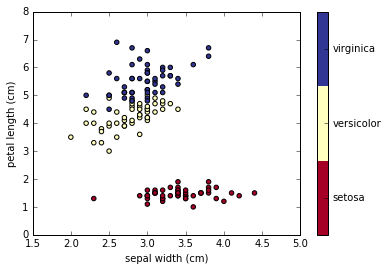

In [39]:
import numpy as np
import matplotlib.pyplot as plt

x_index = 1
y_index = 2

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.colorbar(ticks=[0, 1, 2], format=formatter)

plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

## Training the model

The setup:
* 150 observations
* 4 features (sepal length, sepal width, petal length, petal width)
* Label is the iris species
* Classification problem

## K-nearest neighbors (KNN) classification 

**KNN algorithm**

*Input*: New iris features. 
*Out*: Iris target
*Parameter*: K
* Pick a value for K.
* Search for the K neighbours in the sample data that are nearest to the new iris.
* Return the most popular target value from the K nearest neighbors.

**Dataset**
<img src="images/knn_1.png" alt="source:wikipedia" width="200px">
**1-Nearest neighbours classification**
<img src="images/knn_2.png" alt="source:wikipedia" width="200px">
**5-Nearest neighbours classification**
<img src="images/knn_3.png" alt="source:wikipedia" width="200px">
White areas consists of the points where the vote is tight (no most popular target value).

## scikit-learn in 4 steps

**Step 1**: Import the class you plan to use

In [40]:
from sklearn.neighbors import KNeighborsClassifier

**Step 2**: Instantiate an `Estimator`, scikit-learn's term for model.

In [41]:
knn = KNeighborsClassifier(n_neighbors=1)

We could tune the model by changing the default parameters.
All parameters not specified are set to their defaults

In [42]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


**Step 3**: Model training, i.e. fit the model with data. Model is learning the relationship between iris.data and iris.target. This step occurs in-place.

In [43]:
knn.fit(iris.data, iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

**Step 4**: Predict the response for a new observation. 
New observations are called "out-of-sample" data.
Uses the information it learned during the model training process

In [44]:
# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
# call the "predict" method:

knn.predict([[3, 5, 4, 2],])

array([2])

It returns a NumPy array. We can map this to the label name:

In [45]:
print(iris.target_names[_])

['virginica']



Can predict for multiple observations at once

In [46]:
iris_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
knn.predict(iris_new)

array([2, 1])

You can also create a classification map:

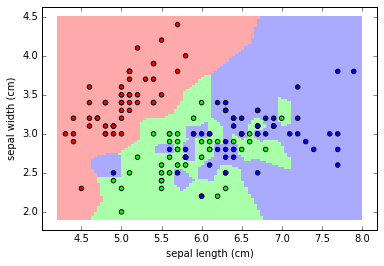

In [48]:
from fig_code import plot_iris
plot_iris(knn)

## Changing the value of K

Easy! We just create a new classifier, fit the data and perform the prediction:

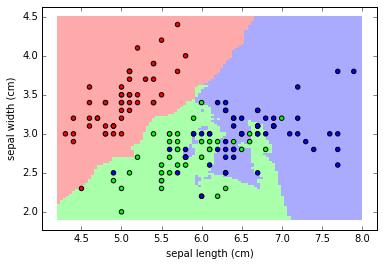

In [63]:
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(iris.data, iris.target)

plot_iris(knn)

## Using a different Classification algorithm

In [22]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(iris.data, iris.target)

# predict the response for new observations
logreg.predict(iris_new)

array([2, 0])

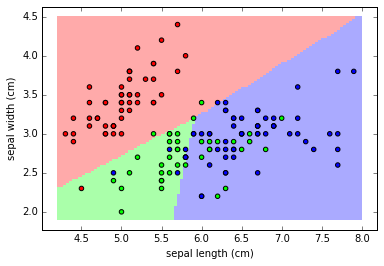

In [23]:
plot_iris(logreg)

The different classification algorithms can give very different results. Therfore, choosing the right algoirhtm is key to obtain good performance.

## Flow Chart: How to Choose your Estimator

This is a flow chart created [Andreas Mueller](https://github.com/amueller) which gives a nice summary of which algorithms to choose in various situations. Keep it around as a handy reference!

<img src="http://scikit-learn.org/dev/_static/ml_map.png">

## Evaluating the performance of a prediction

Evaluating the performane of a prediction is crucial in order to:
* choose which model to use for my supervised learning task;
* choose the best tuning parameters for that model;
* estimate the likely performance of my model on out-of-sample data;

## **Training accuracy**: Train and test on the entire dataset

The following approach is used to compute **training accucarcy**:
     
1. Train the model on the entire dataset.
1. Test the model on the same dataset, and evaluate how well we did by comparing the predicted response values with the true response values.

In [24]:
logreg = LogisticRegression()

# fit the model with data
logreg.fit(iris.data, iris.target)
logreg.predict(iris.data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

scikit provides the function `metrics.accuracy_score` to compute the **training accuracy**:

In [25]:
from sklearn import metrics
metrics.accuracy_score(iris.target, _)

0.95999999999999996

It tells us that we predicted 96% of the predicted samples with the correct label.

Let's test some more:

In [26]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(iris.data, iris.target)
pred_target = knn.predict(iris.data)
metrics.accuracy_score(iris.target, pred_target)

0.96666666666666667

In [27]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(iris.data, iris.target)
pred_target = knn.predict(iris.data)
metrics.accuracy_score(iris.target, pred_target)

1.0

## Evaluation based on cross validation

Idea:
1. Split the sample dataset into two pieces: a training set and a testing set.
1. Train the model on the training set.
1. Test the model on the testing set, and evaluate the accuracy of the prediction.

### Step 1: Split data set into training and testing sets

`scikit` learn provides the function `train_test_split` to split up the saple test

In [51]:
from sklearn.model_selection import train_test_split

# Randomly split iris.data and iris.target into training and testing sets
data_train, data_test, target_train, target_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=4)

Let's check what we got:

In [52]:
data_train.shape

(90, 4)

In [53]:
data_test.shape

(60, 4)

In [54]:
target_train.shape

(90,)

In [32]:
target_test.shape

(60,)

### Step 2: Fit model using training data

In [55]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(data_train, target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

### Step 3: Predict target values for testing values, evaluate performance

First we predict the target values for the test samples:

In [56]:
knn.predict(data_test)

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0, 0, 2, 0, 2, 1,
       0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 0, 2, 0,
       0, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 1])

Then we evaluate the performance of the prediction:

In [57]:
metrics.accuracy_score(target_test, _)

0.96666666666666667

#### We can now test the performance of the prediction for different classification algorithms

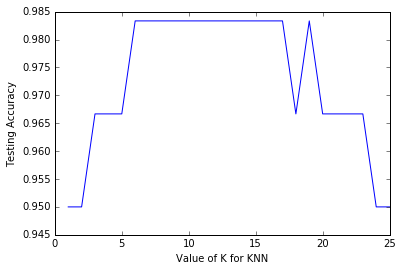

In [58]:
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(data_train, target_train)
    target_pred = knn.predict(data_test)
    scores.append(metrics.accuracy_score(target_test, target_pred))

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Conclusion: It looks like the KNN prediction performs well for K values between 6 and 16.

## Application: Optical Character Recognition

To demonstrate the above principles on a more interesting problem, let's consider OCR (Optical Character Recognition) – that is, recognizing hand-written digits.
In the wild, this problem involves both locating and identifying characters in an image. Here we'll take a shortcut and use scikit-learn's set of pre-formatted digits, which is built-in to the library.

### Loading and visualizing the digits data

We'll use scikit-learn's data access interface and take a look at this data:

In [15]:
from sklearn import datasets
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

Let's plot a few of these:

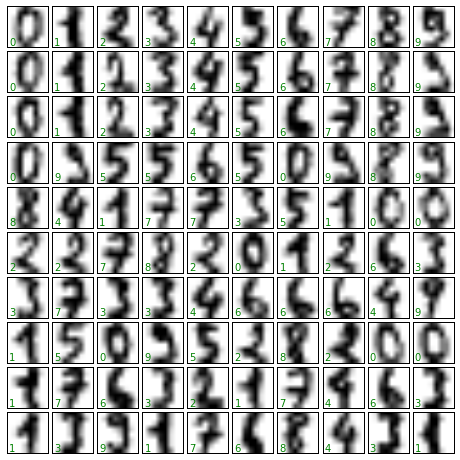

In [16]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

Here the data is simply each pixel value within an 8x8 grid:

In [17]:
# The images themselves
print(digits.images.shape)
print(digits.images[0])

(1797, 8, 8)
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


In [18]:
# The data for use in our algorithms
print(digits.data.shape)
print(digits.data[0])

(1797, 64)
[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]


In [20]:
# The target label
print(digits.target)

[0 1 2 ..., 8 9 8]


So our data have 1797 samples in 64 dimensions.

### Classification on Digits

Let's try a classification task on the digits. The first thing we'll want to do is split the digits into a training and testing sample:

In [21]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=2)
print(Xtrain.shape, Xtest.shape)

(1347, 64) (450, 64)


Let's use a simple logistic regression which (despite its confusing name) is a classification algorithm:

In [22]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2')
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

We can check our classification accuracy by comparing the true values of the test set to the predictions:

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.94666666666666666

This single number doesn't tell us **where** we've gone wrong: one nice way to do this is to use the *confusion matrix*

In [25]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, ypred))

[[42  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  3  1]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  2  0  3  1  0]
 [ 0  2  0  0 36  0  0  0  1  1]
 [ 0  0  0  0  0 52  0  0  0  0]
 [ 0  0  0  0  0  0 42  0  1  0]
 [ 0  0  0  0  0  0  0 48  1  0]
 [ 0  2  0  0  0  0  0  0 38  0]
 [ 0  0  0  1  0  1  0  1  2 34]]


This matrix contains the actual class in the vertical and the predicted class in the horizontal.

/home/sf1409/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


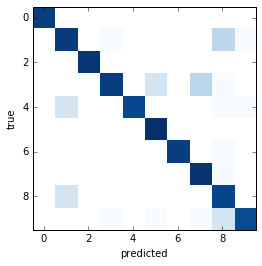

In [26]:
plt.imshow(np.log(confusion_matrix(ytest, ypred)),
           cmap='Blues', interpolation='nearest')
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

We might also take a look at some of the outputs along with their predicted labels. We'll make the bad labels red:

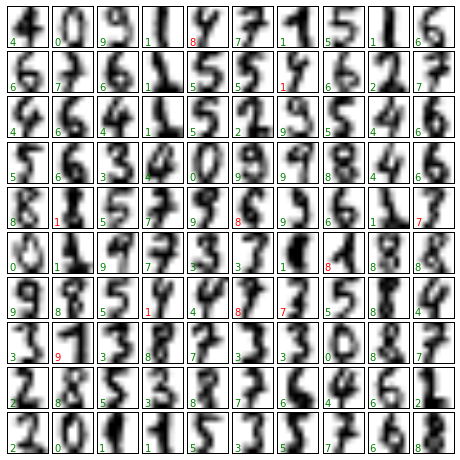

In [27]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(8, 8), cmap='binary')
    ax.text(0.05, 0.05, str(ypred[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == ypred[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])

The interesting thing is that even with this simple logistic regression algorithm, many of the mislabeled cases are ones that we ourselves might get wrong!

There are many ways to improve this classifier, but we're out of time here. To go further, we could use a more sophisticated model, use cross validation, or apply other techniques.
We'll cover some of these topics later in the tutorial.